# Explainable AI

# Exercise

SHAP can be used not only to work with tabular data. Are you able to perform an analysis using Text or Image data? You can find [here an example](https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/sentiment_analysis/Emotion%20classification%20multiclass%20example.html).

As an extra, why not making your Explainable AI analysis sharable with a dashboard? This can be way easier that you might think using [explainerdashboard](https://github.com/oegedijk/explainerdashboard).

In [1]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 6.9 MB/s eta 0:00:00


4422102/4422102 [==============================] - 0s 0us/step


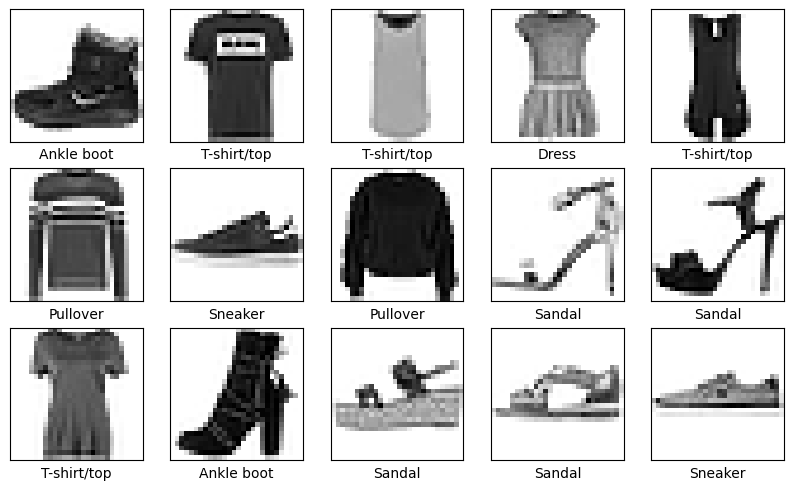

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import shap

# Loading the data and splitting it in train/test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scaling images [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Changing shape to (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

c_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(c_names[y_train[i]])
plt.show()

In [3]:
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation="softmax")
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=64, epochs=3,
          validation_split=0.2)

_ , acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", acc)

Epoch 1/3
750/750 [==============================] - 68s 88ms/step - loss: 0.4073 - accuracy: 0.8573 - val_loss: 0.3173 - val_accuracy: 0.8859
Epoch 2/3
750/750 [==============================] - 54s 72ms/step - loss: 0.2640 - accuracy: 0.9042 - val_loss: 0.2885 - val_accuracy: 0.8985
Epoch 3/3
750/750 [==============================] - 52s 69ms/step - loss: 0.2112 - accuracy: 0.9225 - val_loss: 0.2853 - val_accuracy: 0.8942
Test accuracy: 0.8921999931335449


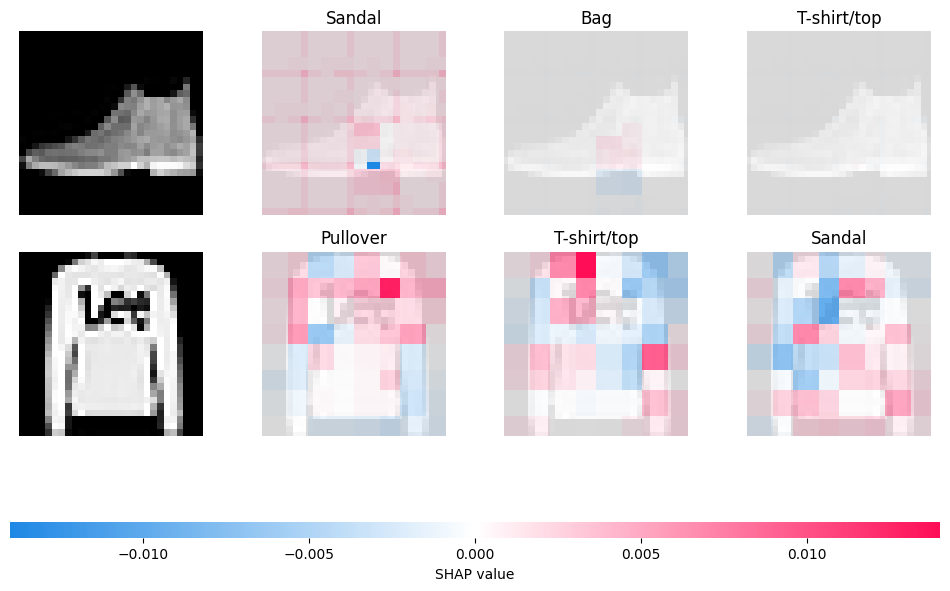

In [4]:
# Creating a masker to mask out partitions of the images.
# More info about Inpainting algorithms can be found here: 
# https://learnopencv.com/image-inpainting-with-opencv-c-python/
masker = shap.maskers.Image("inpaint_ns", x_test[0].shape)

# Creating an explainer using the model and image masker
explainer = shap.Explainer(model, masker, output_names=c_names)

# Explaining two images with SHAP values
# To better understand the model, would also be useful to create probability
# distribution plots to see how confident the model was for each image class
# prediction
shap_values = explainer(x_test[0:2], outputs=shap.Explanation.argsort.flip[:3])
shap.image_plot(shap_values)